In [16]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from pylab import meshgrid
from tqdm import tqdm

## Problem 1 (10 points)

Prove whether the following functions are convex or not.

(a.) $f(x_1,x_2)=(x_1x_2-1)^2$, where $x_1, x_2\in \mathbb{R}$

This function is not convex because if you take two points and connect them linearly, the function lies above the connecting line.

Point 1: $f(-1,-1)=0$

Point 2: $f(1,1)=0$

Point 3: $f(0,0)=1$

Point 3 will lie above Point 1 and Point 2, confirming that the function is not convex.

In [2]:
def z(x1, x2):
    return (x1*x2 - 1) ** 2

x = np.arange(-1.0,1.0,0.1)
y = np.arange(-1.0,1.0,0.1)
X,Y = meshgrid(x, y) # grid of point
Z = z(X, Y)

/tmp/ipykernel_1047460/780045397.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


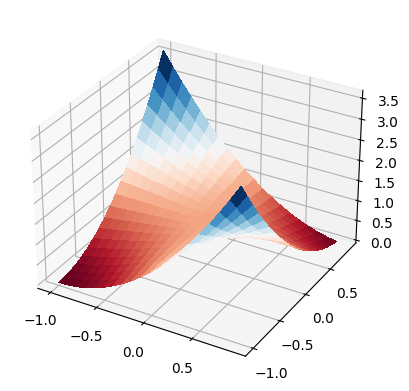

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)
plt.show()

The plot shows Point 3 clearly above Point 1 and Point 2.

(b.) $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$,  where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$

$f(\mathbf{w}_1, \mathbf{w}_2)= (w_{11}-w_{21})^2+(w_{12}-w_{22})^2$

$={w_{11}}^2-2w_{11}w_{12}+{w_{21}}^2+{w_{12}}^2-2w_{21}w_{22}+{w_{22}}^2$

$\nabla f(w_1, w_2) = \begin{bmatrix}
w_{11}-w_{21}\\
w_{21}-w_{11}\\
w_{12}-w_{22}\\
w_{22}-w_{12}
\end{bmatrix}$

$\nabla f^2(w_1, w_2) = \begin{bmatrix}
1 & -1 & 0 & 0\\
-1 & 1 & 0 & 0\\
0 & 0 & 1 & -1\\
0 & 0 & -1 & 1
\end{bmatrix}$

$\lambda_1 = 4$

$\lambda_2 = 4$

$\lambda_3 = 0$

$\lambda_4 = 0$

Because the eigenvalues are nonnegative, the Hessian is considered positive semi-definite. Therefore, the function is convex. 

## Problem 2 (10 points)

Identify stationary points for $f(x) = 2x_1 +12x_2 +x^2_1 -3x^2_2$? Are they local minimum/maximum; global minimum/maximum or saddle points? Why?

$\nabla f(x) = \begin{bmatrix}
2+2x_1\\
12-6x_2
\end{bmatrix}$

$\nabla f^2(x) = \begin{bmatrix}
2 & 0\\
0 & -6
\end{bmatrix}$

Critical Points: 

$2+2x_1=0\\
2x_1 = -2\\
x_1 = -1$

$12-6x_2=0\\
-6x_2 = -12\\
x_2= 2$

The critical point of the function is at $(-1,2)$.

The critical point is a saddle point because the Hessian matrix is indefinite, having both negative and positive eigenvalues along the diagonal. 

## Problem 3 (80 points)

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, we try to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Test the algorithm using the 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [4]:
X_heart = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/X_heart')
y_heart = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/y_heart')
y_epsilons = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/y_epsilonsubset')
x_epsilons = np.loadtxt('/home/clewis7/repos/stor566-notebooks/hmw1/HW1/x_epsilonsubset')

(a) (5 points) Compute the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

$\nabla f(w)= -\frac{1}{N}\sum_{n=1}^N\frac{y_nx_n}{1+e^{y_nw^Tx_n}}+w$

(b) (30 points) Implement the gradient descent algorithm with a fixed step size $\eta$. Find a small $\eta_1$ such that the algorithm converges. Increase the step size to $\eta_2$ so the algorithm cannot converge. Run 50 iterations and plot the iteration versus $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ plot for $\eta_1$ and $\eta_2$. In practice it is impossible to get the exact optimal solution $\mathbf{x}^*$, so use the minimum value you computed as $f(\mathbf{x}^*)$ when you plot the figure. Report the $f(\mathbf{x}^*)$ value you used for generating the plots.

Function to calculate the gradient.

In [5]:
def get_gradient(inputs, outputs, weights): 
    N = outputs.shape[0]
    summed = 0
    i = 0;
    for i in range(outputs.shape[0]):
        numerator = np.inner(outputs[i], inputs[i])
        denominator = 1 + np.exp(np.inner(np.inner(outputs[i], weights.T), inputs[i]))
        summed += (numerator / denominator)
        i += 1
    return ((-1/N)*summed) + weights

Initializing weights randomly and then computing the gradient.

In [6]:
weights = np.random.rand(13,)
gradient = get_gradient(X_heart, y_heart, weights)

Updating the weights with $\alpha=0.05$.

In [7]:
new_weights = weights - (0.05*gradient)
new_weights

array([0.86517761, 0.13965481, 0.6572296 , 0.67333507, 0.50090385,
       0.11342319, 0.16350651, 0.02758585, 0.65798308, 0.67866658,
       0.11081602, 0.23010504, 0.7186607 ])

Find small $\eta_1$ such that the algorithm converges.

$\eta_1 = 0.8$ 

In [8]:
# 50 iteration with stepsize 0.8 shows convergence 
eta1_weights = np.ones(13,)
iter_weights1 = list()
iter_weights1.append(eta1_weights)
step_size = 0.1
eta1_gradients = list()
i = 0
while i < 50:
    gradient = get_gradient(X_heart, y_heart, eta1_weights)
    eta1_gradients.append(gradient)
    eta1_weights = eta1_weights - (step_size*gradient)
    iter_weights1.append(eta1_weights)
    i += 1

Increase step size to $\eta_2$ so the algorithm cannot converge.
$\eta_2 = 2$

In [9]:
# bigger step size for 50 iterations that does not converge
eta2_weights = np.ones(13,)
iter_weights2 = list()
iter_weights2.append(eta2_weights)
step_size = 2
eta2_gradients = list()
i = 0
while i < 50:
    gradient = get_gradient(X_heart, y_heart, eta2_weights)
    eta2_gradients.append(gradient)
    eta2_weights = eta2_weights - (step_size*gradient)
    iter_weights2.append(eta2_weights)
    i += 1

Plot the iteration vs $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ for both $\eta_1$ and $\eta_2$.

**Note: func_eval calculates the loss for a given weight input**

In [10]:
def func_eval(inputs, outputs, weights):
    n = inputs.shape[0]
    summation = 0
    for i in range(n):
        exponential = np.exp(-np.inner(np.inner(outputs[i], weights.T), inputs[i]))
        summation += np.log(1 + exponential)
    summation = summation / n
    return summation + np.inner(weights.T, weights) * 0.5

In [11]:
eta1_losses = list()
for i in range(50):
    eta1_losses.append(func_eval(X_heart, y_heart, iter_weights1[i]))

In [12]:
eta2_losses = list()
for i in range(50):
    eta2_losses.append(func_eval(X_heart, y_heart, iter_weights2[i]))

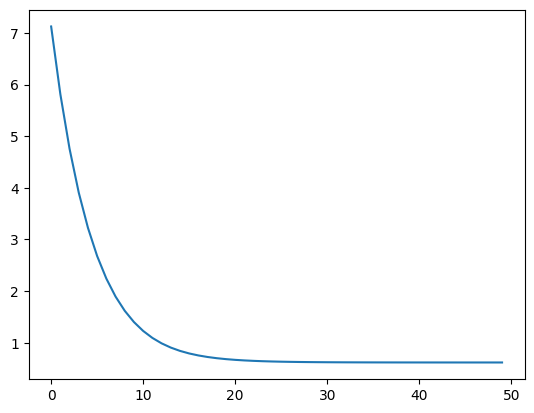

In [13]:
from matplotlib import pyplot as plt
plt.plot(eta1_losses)

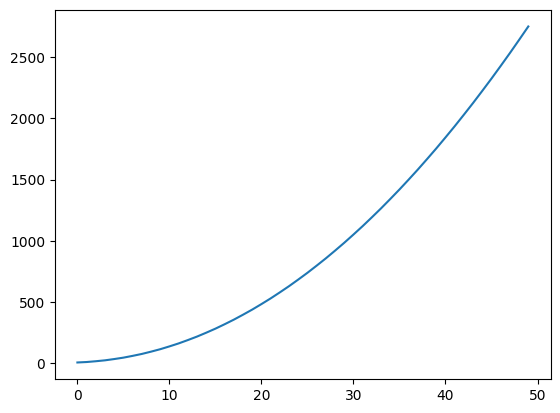

In [14]:
plt.plot(eta2_losses)

(c) (5 points) Write down the pseudo code of gradient descent with backtracking line search ($\sigma=0.01$).

Initialize the weights $w_0$ to pass to function 

For a given number of iterations:

    Get the negative gradient of the weights passed to the function

    Get the loss of the weights passed to the function

    While condition for gradient descent is not satisfied:
    
        divide alpha by 2
        
    update weights based on appropriate alpha 

(d) (20 points) Implement the gradient descent algorithm with backtracking line search ($\sigma=0.01$). Plot the same iteration versus $\log(f(\mathbf{x}^k) -f(\mathbf{x}^*))$ plot.

In [17]:
weights = np.random.rand(13,)

alpha_init = 2
sigma = 0.01
losses = list()
alphas = list()
weights_l = list()

alpha = alpha_init
for i in tqdm(range(50)):
    d = -1 * get_gradient(X_heart, y_heart, weights)
    loss = func_eval(X_heart, y_heart, (weights + (alpha * d)))
    weights_l.append(weights)
    
    losses.append(loss)
    
    alpha = alpha_init
    
    while (func_eval(X_heart, y_heart, (weights + (alpha * d)))) > (func_eval(X_heart, y_heart, weights) + (alpha * sigma * np.inner(get_gradient(X_heart, y_heart, weights).T, d))):
        alpha = alpha / 2
                        
    alphas.append(alpha)
                        
    weights = weights + (alpha * d)

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 85.37it/s]


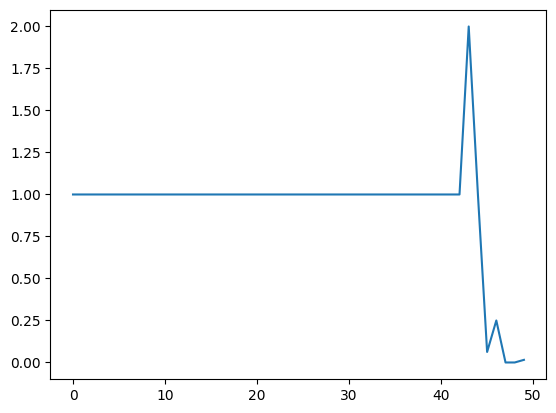

In [18]:
plt.plot(alphas)

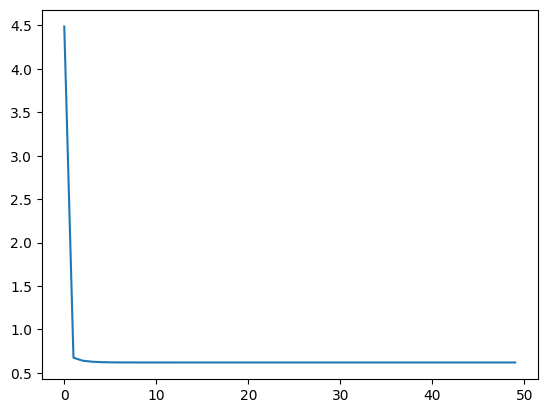

In [19]:
plt.plot(losses)

(e) (20 points) Test your implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. Plot the same iteration vs error plot.

In [20]:
weights = np.random.rand(2000,)

alpha_init = 0.6
sigma = 0.01
losses = list()
alphas = list()
weights_l = list()

alpha = alpha_init
for i in tqdm(range(50)):
    d = -1 * get_gradient(x_epsilons, y_epsilons, weights)
    loss = func_eval(x_epsilons, y_epsilons, (weights + (alpha * d)))
    weights_l.append(weights)
    
    losses.append(loss)
    
    alpha = alpha_init
    
    while (func_eval(x_epsilons, y_epsilons, (weights + (alpha * d)))) > (func_eval(x_epsilons, y_epsilons, weights) + (alpha * sigma * np.inner(get_gradient(x_epsilons, y_epsilons, weights).T, d))):
        alpha = alpha / 2
                        
    alphas.append(alpha)
                        
    weights = weights + (alpha * d)

100%|███████████████████████████████████████████| 50/50 [04:24<00:00,  5.28s/it]


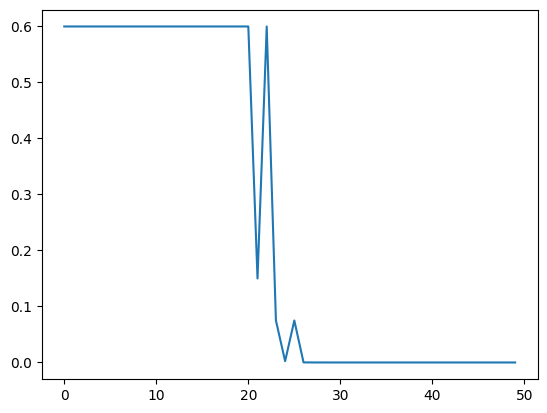

In [21]:
plt.plot(alphas)

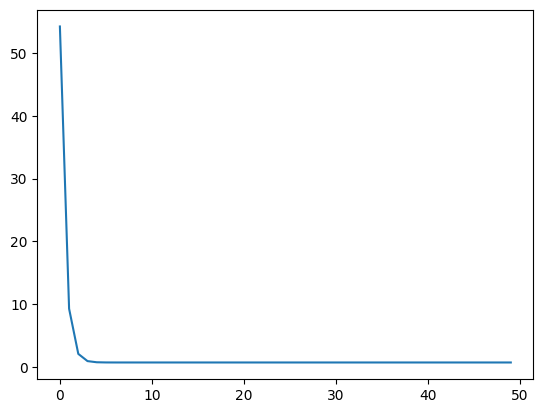

In [23]:
plt.plot(losses)

In [24]:
weights

array([ 3.22672670e-04, -4.38829337e-06,  2.59214723e-04, ...,
        3.98437676e-05,  2.75462685e-05,  3.20403155e-05])